In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import theta
from sympy.plotting import plot
import sympy as sp
from sympy import init_printing
from IPython.display import display, Math
import sympy as sp
sp.init_printing()  # Ensures LaTe

init_printing(use_latex=True)
t_val = np.linspace(0, 10, 100)

# position 2D -> x(t), change in position with respect to time

#velocity


position 2D -> x(t), change in position with respect to time
velocity: the change is posistion with respect to time
dx/dt
accerleration: the change in velocity with respect to time
dx^2/dt^2


In [ ]:
t = sp.symbols('t')

x = t**3 -6*t**2-15*t + 40
plot(x,(t,0,10),title = "Position")
x_prime = sp.diff(x, t)
sol = sp.solve(x_prime, t)
print(sol)
print("First Derivative:")
display(Math(r'\textcolor{white}{' + sp.latex(x_prime) + '}'))
plot(x_prime,(t,0,10),title = "Velocity")
displacement = sp.integrate(x_prime, (t, 0, 5))
print(f"displacement: {displacement}")
x_prime2 = sp.diff(x, t,2)
print("Second Derivative:")
display(Math(r'\textcolor{white}{' + sp.latex(x_prime2) + '}'))
plot(x_prime2,(t,0,10),title = "Acceleration")





In [ ]:
v = sp.lambdify(t, x_prime2,"numpy")
# plt.plot(t,v)

In [ ]:
v = sp.lambdify(t, x_prime)
plt.plot(t_val,v(t_val))

In [ ]:
from vpython import sphere, vector, rate

# Create central body (e.g., the Sun)
sun = sphere(pos=vector(0,0,0), radius=1, color=vector(1,1,0))

# Create orbiting planet
planet = sphere(pos=vector(5,0,0), radius=0.3, color=vector(0,0,1), make_trail=True)

# Orbital motion parameters
G = 1  # Gravitational constant (simplified)
M = 10  # Mass of the Sun
r = vector(5, 0, 0)  # Initial position
v = vector(0, 2, 0)  # Initial velocity
dt = 0.01  # Time step

# Animation loop
while True:
    rate(100)  # Control animation speed

    # Compute gravitational force
    F = -G * M * r.norm() / r.mag2

    # Update velocity and position
    v = v + F * dt
    r = r + v * dt
    planet.pos = r


In [ ]:
def circle_plot(r:int):
    x = []
    y = []
    theta_list = np.linspace(0,2*np.pi, 100)
    
    for theta in enumerate(theta_list):
        x.append(r * np.cos(theta))
        y.append(r * np.sin(theta))
    plt.plot(x,y)        
    

<class 'float'>
POS: [6741000.       0.       0.]


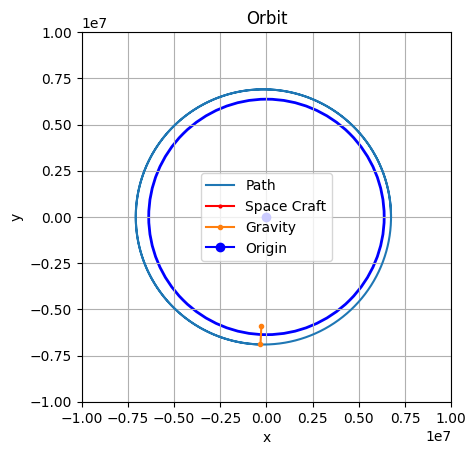

In [433]:

    

dt =.1
# sun_mass = float(1.989E30)
earth_radius = 6371E3
altitude = 370000
orbital_alt = altitude + earth_radius
earth_mass = float(5.972E24)
r = float(42164)
x = orbital_alt
y = 0
z = 0
G = float(6.67E-11)
satellite_pos = np.array([x, y, z])
satellite_velocity = 7778.496 # m/s
print(type(G))
gravity_unit_vec = np.array([-1, y/r, z/r])
satellite_velocity_vec = np.array([0, satellite_velocity, 0])
a = ((G*earth_mass)/orbital_alt**2) * gravity_unit_vec
# t = np.arange(0,100000,5)
x_pos_list = []
y_pos_list = []
print(f"POS: {satellite_pos}")
for _ in range(100000):
    # print(f"Gravity Vec: {gravity_unit_vec}")
    # print(f"Acceleration: {a}")
    a = ((G*earth_mass)/np.linalg.norm(satellite_pos)**2) * gravity_unit_vec
    # check = input("enter")
    # if check == "s":
    #     break
    satellite_velocity_vec = satellite_velocity_vec + a*dt
    # print(f"Velocity: {v}")
    satellite_pos += satellite_velocity_vec*dt
    # print(f"POS: {satellite_pos}")
    gravity_unit_vec = (np.array([0,0,0])-satellite_pos) / (np.linalg.norm(satellite_pos - np.array([0,0,0])))
    # print(f"new gravity Vec: {gravity_unit_vec}")
    # print(f"Gravity mag: {np.linalg.norm(gravity_unit_vec)}")
    x_pos_list.append(satellite_pos[0])
    y_pos_list.append(satellite_pos[1])
    

# Create figure and axis
fig, ax = plt.subplots()

# Plot orbit path
ax.plot(x_pos_list, y_pos_list, label="Path")
ax.plot(x_pos_list[-1], y_pos_list[-1], label="Space Craft",marker="o", markersize=2,color="red")
# Plot gravity vector
gravity_unit_vec = gravity_unit_vec*1000000
ax.plot([x_pos_list[-1], (x_pos_list[-1]+gravity_unit_vec[0])], [y_pos_list[-1],(y_pos_list[-1]+ gravity_unit_vec[1])], label="Gravity", marker='.')  # Scale for visibility


# Plot origin (Earth center)
ax.plot(0, 0, label="Origin", marker="o", markersize=6, color="blue")

# Add a circle for Earth
earth_circle = plt.Circle((0, 0), earth_radius, color='b', fill=False, linewidth=2)
ax.add_patch(earth_circle)  # Add circle to the axes

# Formatting
scale = 1e7
ax.set_xlim(-scale, scale)
ax.set_ylim(-scale, scale)
ax.set_aspect('equal')  # Ensure 1:1 aspect ratio
plt.grid()
plt.legend()
plt.title('Orbit')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [410]:
print(gravity_unit_vec)
print(x_pos_list[-1], y_pos_list[-1])
print([x_pos_list[-1], (x_pos_list[-1]+gravity_unit_vec[0])], [y_pos_list[-1],(y_pos_list[-1]+ gravity_unit_vec[1])])

[-6838.22026919  7296.48843966     0.        ]
4653603.509292997 -4965468.041635622
[np.float64(4653603.509292997), np.float64(4646765.28902381)] [np.float64(-4965468.041635622), np.float64(-4958171.553195964)]


In [434]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
matplotlib.use('TkAgg')  # Use TkAgg instead of InterAgg
from datetime import datetime
import time


def log_time(func):
    def wrapper():
        current_date_and_time = datetime.now()
        start = time.time()
        steps = func()
        end = time.time()
        total_time = end - start
        with open("log.txt", "a") as file:  # "w" mode creates or overwrites the file
            file.write(
                f"Ran code at {current_date_and_time}, with {steps} steps, and a total run time: {total_time}...\n")
        print(f"Total run time: {total_time}...")

    return wrapper


@log_time
def main():
    inspace = False

    earth_radius = 6371E3
    if inspace:
        altitude = 370000
        orbital_alt = altitude + earth_radius
        x = orbital_alt
        y = 0
        z = 0
        satellite_pos = np.array([x, y, z])
        satellite_velocity = 7778.496  # m/s
        satellite_velocity_vec = np.array([0, satellite_velocity, 0])
    else:
        print("Launch")
        angle = np.radians(15)
        altitude = 370000
        # orbital_alt = altitude + earth_radius
        x = earth_radius
        y = 0
        z = 0
        satellite_pos = np.array([x, y, z])
        satellite_velocity = 7778.496  # m/s
        satellite_velocity_vec = np.array([satellite_velocity*np.cos(angle), satellite_velocity*np.sin(angle), 0])

    steps = 10000
    dt = .1
    # sun_mass = float(1.989E30)

    earth_mass = float(5.972E24)
    G = float(6.67E-11)
    gravity_unit_vec = np.array([-1, 0, 0])



    # t = np.arange(0,100000,5)
    x_pos_list = []
    y_pos_list = []

    for _ in range(steps):


        a = ((G * earth_mass) / np.linalg.norm(satellite_pos) ** 2) * gravity_unit_vec

        satellite_velocity_vec = satellite_velocity_vec + a * dt

        satellite_pos += satellite_velocity_vec * dt

        gravity_unit_vec = (np.array([0, 0, 0]) - satellite_pos) / (np.linalg.norm(satellite_pos - np.array([0, 0, 0])))

        x_pos_list.append(satellite_pos[0])
        y_pos_list.append(satellite_pos[1])

    # Create figure and axis
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    # Plot orbit path
    ax.plot(x_pos_list, y_pos_list, label="Path")
    ax.plot(x_pos_list[-1], y_pos_list[-1], label="Space Craft", marker="o", markersize=2, color="red")
    # Plot gravity vector
    gravity_unit_vec = gravity_unit_vec * 1000000
    # ax.plot([x_pos_list[-1], (x_pos_list[-1] + gravity_unit_vec[0])],
    #         [y_pos_list[-1], (y_pos_list[-1] + gravity_unit_vec[1])], label="Gravity",
    #         marker='.')  # Scale for visibility

    # Plot origin (Earth center)
    # Add a circle for Earth
    earth_circle = plt.Circle((0, 0), earth_radius, color='b', fill=True)
    ax.add_patch(earth_circle)  # Add circle to the axes
    earth_img = mpimg.imread("earth.png")
    ax.imshow(earth_img, extent=[-earth_radius, earth_radius, -earth_radius, earth_radius])
    # ax.plot(0, 0, label="Origin", marker="o", markersize=6, color="blue")



    # Formatting
    scale = 1e7
    ax.set_xlim(-scale, scale)
    ax.set_ylim(-scale, scale)
    ax.set_aspect('equal')  # Ensure 1:1 aspect ratio
    plt.grid(False)
    plt.legend()
    plt.title('Orbit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return steps


if __name__ == '__main__':
    main()



Launch
Total run time: 1.5174262523651123...


In [444]:
ground = satellite_pos/np.linalg.norm(satellite_pos)*earth_radius
print(ground)
print(satellite_pos)
print(np.linalg.norm(satellite_pos-ground))



# theta_list = np.linspace(0, 2*np.pi, 100)
# print(theta_list)

[ -297442.57638536 -6364052.86855422        0.        ]
[ -322626.72049829 -6902890.40328672        0.        ]
539425.7409053604
